In [348]:
import Plots as plt
import Flux , Statistics ,DataFrames , OneHotArrays

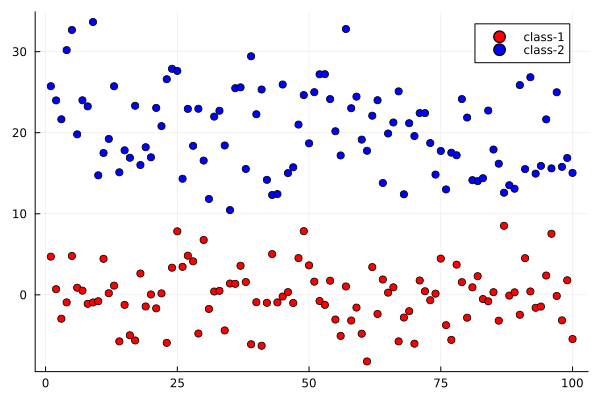

In [444]:
# Generate the Dataset
x1 = randn(100) .* 3;
x2 = 20 .+ randn(100) .* 5;
t = 1:100


plt.scatter(t,x1,color=:red,label="class-1")
plt.scatter!(t,x2,color=:blue,label="class-2")

In [445]:
X = hcat([x1 ; x2])
Y = hcat([ones(100) ; zeros(100)]) # class-1 -> 1 and class-2 -> 0
println((X|>size , Y|>size))

((200, 1), (200, 1))


In [281]:
Yonehot = unique(Y) .== permutedims(Y) # One hot

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2 and 200

In [132]:
# Note
[0.0 ; 1.0] .== [1.0 0.0 1.0 1.0 0.0]

2×5 BitMatrix:
 0  1  0  0  1
 1  0  1  1  0

In [133]:
W = rand(Float32,2,1);
b = Float32.([0,0]);

In [169]:
# Build a model
train_step(w,b,x) = (w.*x .+b) |> Flux.σ  # Softmax activation function

# loss
function custom_loss(W, b, x, y)
    ŷ = train_step(W, b, x)
    Flux.logitcrossentropy(ŷ, Y)
end;

function custom_onecold(custom_y_onehot)
    max_idx = [x[1] for x in argmax(custom_y_onehot; dims=1)]
    vec(classes[max_idx])
end;

# Accuracy
custom_accuracy(W, b, x, y) = mean(custom_onecold(train_step(W, b, x)) .== y);





In [180]:
# Train the model
function logistic_regression(X,Y,epochs,lr)
    accuracy = [] 
    nclasses = unique(Y) |> length
    Yonehot = nclasses .== permutedims(Y)
    W = rand(Float32 , nclasses , min(size(X)...))
    b = zeros(Float32,nclasses);
    for e in 1:epochs
        dLdW, dLdb, _, _ = Flux.gradient(custom_loss, W, b, X, Yonehot);
        W .= W .- lr .* dLdW
        b .= b .- lr .* dLdb
        acc = custom_accuracy(W, b, X, Y)
        append!(accuracy,acc)
        acc >= 0.98 && break
    end
    return W,b,accuracy
end

logistic_regression (generic function with 1 method)

In [181]:
W,b,acc = logistic_regression(X,Y,100,0.0001)

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2 and 200

In [150]:
W = rand(Float32,2,min(size(X)...))

2×1 Matrix{Float32}:
 0.32157642
 0.3689158

In [220]:
X = transpose(X)
X |> size

(1, 200)

In [221]:
custom_y_onehot = unique(Y) .== permutedims(Y)

m(W, b, x) = W*x .+ b
julia> W = rand(Float32, 2, 1);

julia> b = [0.0f0, 0.0f0];

custom_model(W, b, X) = m(W, b, X) |> Flux.σ


function custom_loss(W, b, X, Y)
    ŷ = custom_model(W, b, X)
    Flux.logitcrossentropy(ŷ, Y)
end;

custom_loss(W, b, X, custom_y_onehot)

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2 and 3

In [222]:
function train_custom_model()
    dLdW, dLdb, _, _ = Flux.gradient(custom_loss, W, b, X, custom_y_onehot)
    W .= W .- 0.1 .* dLdW
    b .= b .- 0.1 .* dLdb
end;

for i = 1:500
    train_custom_model();
    custom_accuracy(W, b, X, Y) >= 0.98 && break
end

@show custom_accuracy(W, b,X, Y);

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2 and 3

In [446]:
sigmoid(a) = @. 1 / (1 + exp(-a)) # Activation Function

loss(y,ŷ) = Statistics.mean(-y .* log.(ŷ) .- (1 .- y) .* log.(1 .- ŷ)) # Loss function(logitcrossentropy)

function predict(X , theta)
    ŷ = sigmoid(X * theta)
    for i in 1:length(ŷ)
        if ŷ[i] <= 0.5
            ŷ[i] = 0
        else
            ŷ[i] = 1
        end
    end
    return ŷ
end

function LogisticRegression(x,y,epochs,lr)
    losses = Dict() # Save losses of each epoch

    θ = zeros(size(x,2)) # weights initialization
    for e in 1:epochs
        ŷ = sigmoid(x * θ)
        gradient = (transpose(X) * (ŷ .- y)) ./ length(y) # calculate gradient
        θ .-= lr * gradient # Update theta
        ŷ = (θ .* x) |> sigmoid 
        losses[e] = loss(y,ŷ) # Save loss
    end
    println("loss = $(losses[epochs])")
    return θ , losses
end

LogisticRegression (generic function with 1 method)

In [447]:
theta , losses = LogisticRegression(X,Y,100000,0.001)

loss = 0.3857987940175377


([-0.1904154494552197], Dict{Any, Any}(92533 => 0.3857987940175377, 76914 => 0.3857987940175377, 45120 => 0.3857987940175377, 1703 => 0.3857987941652555, 37100 => 0.3857987940175377, 90240 => 0.3857987940175377, 60540 => 0.3857987940175377, 91393 => 0.3857987940175377, 59930 => 0.3857987940175377, 3406 => 0.3857987940175377…))

In [414]:
losses = sort(collect(losses),by=x->x[1])

10000-element Vector{Pair{Any, Any}}:
     1 => 0.7385249281114653
     2 => 0.580358790835636
     3 => 0.538867207234671
     4 => 0.5387349211430085
     5 => 0.5386505062784396
     6 => 0.5386195763909735
     7 => 0.5386029791835868
     8 => 0.5385960813308248
     9 => 0.5385926670501023
    10 => 0.5385911652261
       ⋮
  9992 => 0.5385898458848795
  9993 => 0.5385898458848795
  9994 => 0.5385898458848795
  9995 => 0.5385898458848795
  9996 => 0.5385898458848795
  9997 => 0.5385898458848795
  9998 => 0.5385898458848795
  9999 => 0.5385898458848795
 10000 => 0.5385898458848795

In [448]:
pred = predict(X,theta)

200-element Vector{Float64}:
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [451]:
Statistics.mean(pred .== Y)

0.745